In [2]:
import sys
# sklearn ≥0.20 필수
import sklearn
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os
# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "natural_language_processing"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
import warnings
warnings.filterwarnings(action='ignore')

### 토큰화 - 문장이나 단어 단위로 분리하는 것

In [1]:
# nltk 패키지의 punkt 서브 패키지 설치
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# 문장 토큰화
text_sample = 'Hello World! Steve Jobs. 리처드 스톨만. 데니스 리치히,'
from nltk import sent_tokenize
sentences = sent_tokenize(text_sample)
print(sentences)

['Hello World!', 'Steve Jobs.', '리처드 스톨만.', '데니스 리치히,']


In [6]:
# 단어 토큰화
sentence = '손으로 코딩하고 뇌로 컴파일하며 눈으로 디버깅한다 \r\n 품질은 양보다 중요하다 한 번의 홈런이 두 번의 더블보다 낫다'
from nltk import word_tokenize
words = word_tokenize(sentence)
print(words)

['손으로', '코딩하고', '뇌로', '컴파일하며', '눈으로', '디버깅한다', '품질은', '양보다', '중요하다', '한', '번의', '홈런이', '두', '번의', '더블보다', '낫다']


### 스톱워드 제거

In [13]:
import nltk
nltk.download('stopwords')
print('불용어 개수 :', len(nltk.corpus.stopwords.words('english')))
print('불용어 :', nltk.corpus.stopwords.words('english')[:50])

stopwords = nltk.corpus.stopwords.words('english')
# print(type(stopwords))
stopwords.append('jobs')
print('불용어 개수 :', len(stopwords))

불용어 개수 : 179
불용어 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be']
불용어 개수 : 180


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# 문장 토큰화
text_sample = 'I Love You Hello World! Steve Jobs. 리처드 스톨만. 데니스 리치히,'
sentences = sent_tokenize(text_sample)
wordtokens = [word_tokenize(sentence) for sentence in sentences]
print(wordtokens)

[['I', 'Love', 'You', 'Hello', 'World', '!'], ['Steve', 'Jobs', '.'], ['리처드', '스톨만', '.'], ['데니스', '리치히', ',']]


In [15]:
# 불용어를 제거한 단어들
all_tokens = []

for sentence in wordtokens:
    filtered_words = []
    for word in sentence:
        word = word.lower()
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)

print(all_tokens)

[['love', 'hello', 'world', '!'], ['steve', '.'], ['리처드', '스톨만', '.'], ['데니스', '리치히', ',']]


### 단어의 어근 찾기

In [16]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

### COO 방식의 희소 행렬 표현

In [19]:
from scipy import sparse
data = np.array([3,1,2])

row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))
print(sparse_coo)

  (0, 0)	3
  (0, 2)	1
  (1, 1)	2


### CSR 형식을 이용한 희소 행렬

In [21]:
dense2 = np.array([[0,0,1,0,0,5], [1,4,0,3,2,5],
                   [0,6,0,3,0,0], [2,0,0,0,0,0],
                   [0,0,0,7,0,8], [1,0,0,0,0,0]])
# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])
# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
row_pos_index = np.array([0, 2, 7, 9, 10, 12, 13])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_index)) 
print(sparse_csr.toarray())

[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [22]:
pip install pytagcloud

     ---------------------------------------- 0.0/754.7 kB ? eta -:--:--
      --------------------------------------- 10.2/754.7 kB ? eta -:--:--
     --- --------------------------------- 61.4/754.7 kB 825.8 kB/s eta 0:00:01
     ------ ------------------------------- 122.9/754.7 kB 1.2 MB/s eta 0:00:01
     ------ ------------------------------- 122.9/754.7 kB 1.2 MB/s eta 0:00:01
     ------- ---------------------------- 153.6/754.7 kB 766.6 kB/s eta 0:00:01
     ------- ---------------------------- 153.6/754.7 kB 766.6 kB/s eta 0:00:01
     ------- ---------------------------- 153.6/754.7 kB 766.6 kB/s eta 0:00:01
     ------- ---------------------------- 153.6/754.7 kB 766.6 kB/s eta 0:00:01
     ------- ---------------------------- 153.6/754.7 kB 766.6 kB/s eta 0:00:01
     ------- ---------------------------- 153.6/754.7 kB 766.6 kB/s eta 0:00:01
     ---------- ------------------------- 225.3/754.7 kB 458.5 kB/s eta 0:00:02
     ---------- ------------------------- 225.3/754.7

In [23]:
pip install pygame

  Obtaining dependency information for pygame from https://files.pythonhosted.org/packages/a7/56/3b86cf4fdf4fc37b8d5681de41dcc17d2ab44c1dfaf490d5ee1ca5165724/pygame-2.5.1-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 1.1 MB/s eta 0:00:10
   ---------------------------------------- 0.1/10.6 MB 1.1 MB/s eta 0:00:10
    --------------------------------------- 0.1/10.6 MB 774.0 kB/s eta 0:00:14
    --------------------------------------- 0.2/10.6 MB 841.6 kB/s eta 0:00:13
    --------------------------------------- 0.2/10.6 MB 731.4 kB/s eta 0:00:15
    --------------------------------------- 0.2/10.6 MB 731.4 kB/s eta 0:00:15
    --------------------------------------- 0.2/10.6 MB 731.4 kB/s eta 0:00:15
    --------------------------------------- 0.2/10.6 MB 731.4 kB/s eta 0:00:15
    ----------------------

In [24]:
pip install simplejson

     ---------------------------------------- 0.0/75.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/75.5 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/75.5 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/75.5 kB ? eta -:--:--
     --------------- ---------------------- 30.7/75.5 kB 330.3 kB/s eta 0:00:01
     --------------- ---------------------- 30.7/75.5 kB 330.3 kB/s eta 0:00:01
     --------------- ---------------------- 30.7/75.5 kB 330.3 kB/s eta 0:00:01
     --------------- ---------------------- 30.7/75.5 kB 330.3 kB/s eta 0:00:01
     --------------- ---------------------- 30.7/75.5 kB 330.3 kB/s eta 0:00:01
     --------------------- ----------------- 41.0/75.5 kB 89.3 kB/s eta 0:00:01
     --------------------- ----------------- 41.0/75.5 kB 89.3 kB/s eta 0:00:01
     --------------------- ----------------- 41.0/75.5 kB 89.3 kB/s eta 0:00:01
     ------------------------------ ------- 61.4/75.5 kB 113.0 kB/s et

### pytagcloud 를 이용한 wordcloud

In [25]:
import pytagcloud
import collections

#데이터 생성
nouns = list()
nouns.extend(['불고기' for t in range(8)])
nouns.extend(['비빔밥' for t in range(7)])
nouns.extend(['김치찌개' for t in range(7)])
nouns.extend(['돈까스' for t in range(6)])
nouns.extend(['순두부백반' for t in range(6)])
nouns.extend(['짬뽕' for t in range(6)])
nouns.extend(['짜장면' for t in range(6)])
nouns.extend(['삼겹살' for t in range(5)])
nouns.extend(['초밥' for t in range(5)])
nouns.extend(['우동' for t in range(5)])

print(nouns)

pygame 2.5.1 (SDL 2.28.2, Python 3.10.9)
Hello from the pygame community. https://www.pygame.org/contribute.html
['불고기', '불고기', '불고기', '불고기', '불고기', '불고기', '불고기', '불고기', '비빔밥', '비빔밥', '비빔밥', '비빔밥', '비빔밥', '비빔밥', '비빔밥', '김치찌개', '김치찌개', '김치찌개', '김치찌개', '김치찌개', '김치찌개', '김치찌개', '돈까스', '돈까스', '돈까스', '돈까스', '돈까스', '돈까스', '순두부백반', '순두부백반', '순두부백반', '순두부백반', '순두부백반', '순두부백반', '짬뽕', '짬뽕', '짬뽕', '짬뽕', '짬뽕', '짬뽕', '짜장면', '짜장면', '짜장면', '짜장면', '짜장면', '짜장면', '삼겹살', '삼겹살', '삼겹살', '삼겹살', '삼겹살', '초밥', '초밥', '초밥', '초밥', '초밥', '우동', '우동', '우동', '우동', '우동']


In [34]:
#데이터 개수 세기
count = collections.Counter(nouns)
tag2 = count.most_common(100)
# print(count)
# print(tag2)

#태그 목록 만들기
taglist = pytagcloud.make_tags(tag2, maxsize=50)
print(taglist)

#태그 클라우드 생성
pytagcloud.create_tag_image(taglist, 'wordcloud.png', size=(900, 600), fontname='Korean',
rectangular=False)

[{'color': (87, 10, 58), 'size': 106, 'tag': '불고기'}, {'color': (28, 90, 215), 'size': 95, 'tag': '비빔밥'}, {'color': (20, 71, 202), 'size': 95, 'tag': '김치찌개'}, {'color': (43, 128, 163), 'size': 84, 'tag': '돈까스'}, {'color': (86, 109, 97), 'size': 84, 'tag': '순두부백반'}, {'color': (24, 50, 185), 'size': 84, 'tag': '짬뽕'}, {'color': (111, 188, 116), 'size': 84, 'tag': '짜장면'}, {'color': (46, 156, 80), 'size': 73, 'tag': '삼겹살'}, {'color': (142, 153, 173), 'size': 73, 'tag': '초밥'}, {'color': (154, 129, 186), 'size': 73, 'tag': '우동'}]


In [36]:
for x, cnt in count.items():
    print(x, cnt)

불고기 8
비빔밥 7
김치찌개 7
돈까스 6
순두부백반 6
짬뽕 6
짜장면 6
삼겹살 5
초밥 5
우동 5


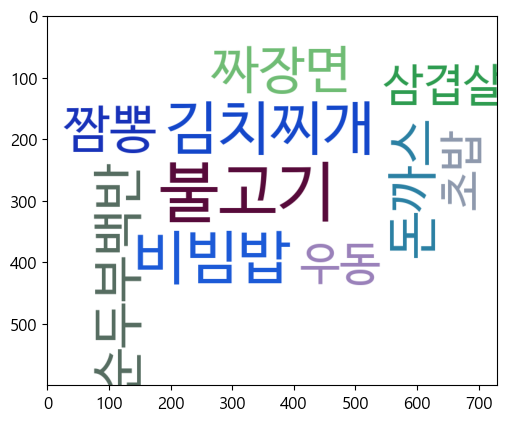

In [35]:
import matplotlib.pyplot
import matplotlib.image
img = matplotlib.image.imread('wordcloud.png')
imgplot = matplotlib.pyplot.imshow(img)
matplotlib.pyplot.show()

### wordcloud 패키지 이용한 이미지 안에 워드클라우드 출력

In [37]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/5a/5f/f4164295d6853ec6203bc728dea4da76a7145ba70482eab9e994d26e0e13/wordcloud-1.9.2-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/152.1 kB ? eta -:--:--
   ---------------------------------------- 152.1/152.1 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


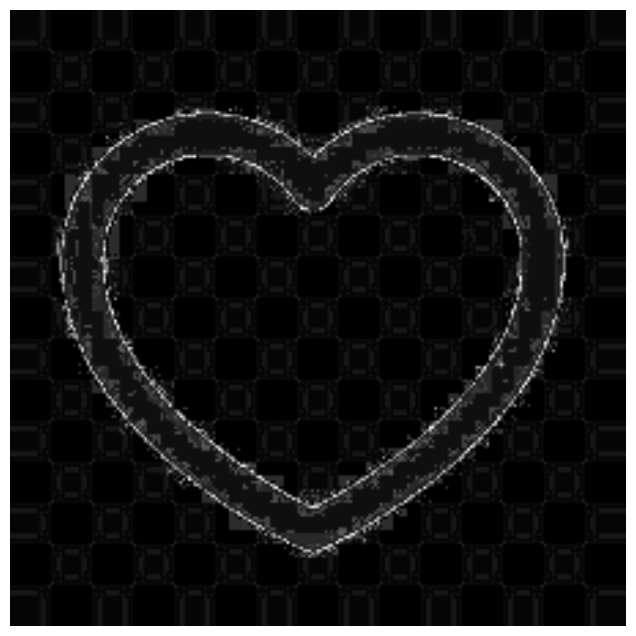

In [44]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
#이미지 출력
mask = np.array(Image.open('./data/heart.png'))
plt.figure(figsize=(8,8))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

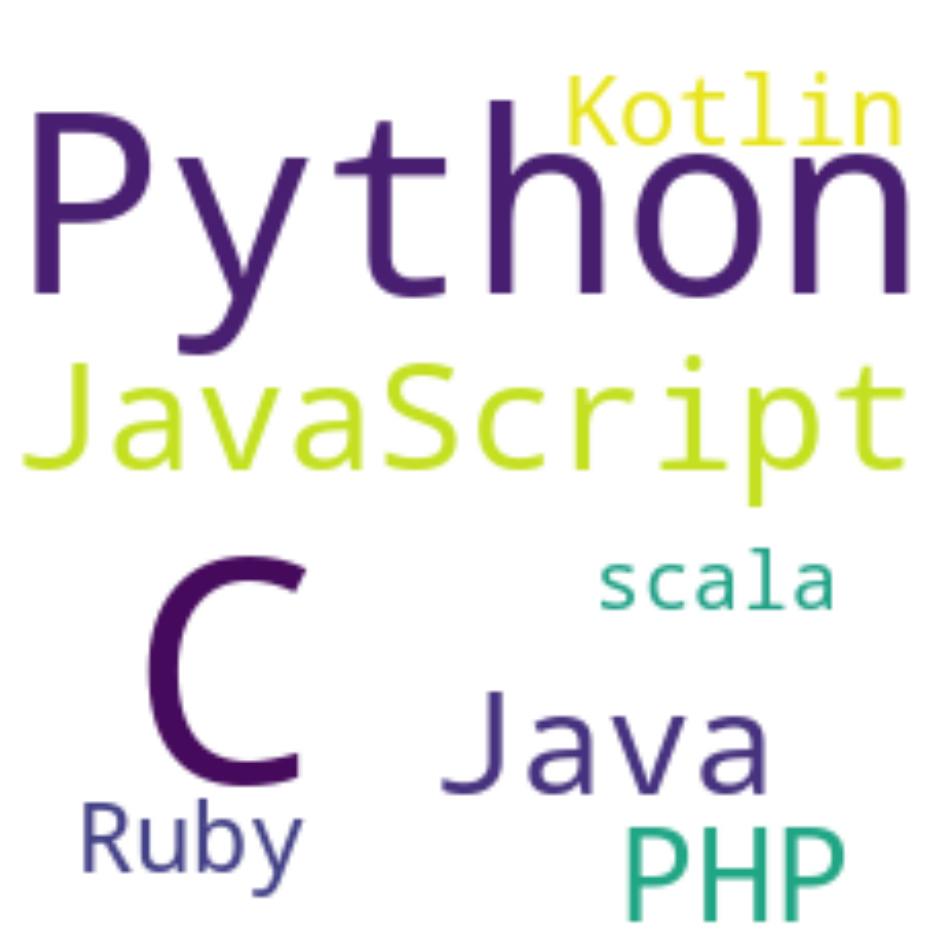

In [51]:
# 문자열 만들기
text = ''
for t in range(8):
    text = text + 'Python '
for t in range(7):
    text = text + 'Java '
for t in range(7):
    text = text + 'C '
for t in range(8):
    text = text + 'JavaScript '
for t in range(5):
    text = text + 'C# '
for t in range(3):
    text = text + 'Ruby '
for t in range(2):
    text = text + 'scala '
for t in range(6):
    text = text + 'PHP '
for t in range(3):
    text = text + 'Swift '
for t in range(3):
    text = text + 'Kotlin ' 

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("Swift")

wordcloud = WordCloud(background_color='white', max_words=2000,
                      mask=mask, stopwords = stopwords)
wordcloud = wordcloud.generate(text)
wordcloud.words_

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 동아일보에서 검색한 내용을 가지고 WordCloud 만들기

In [29]:
#Web의 정적 컨텐츠를 다운로드 받기 위한 패키지
import requests
from urllib.parse import quote

#HTML 파싱을 위한 패키지
from bs4 import BeautifulSoup

keyword = input('검색어:')
target_URL = 'https://www.donga.com/news/search?p=1&query=' + quote(keyword) + '&check_news=1&more=1&sorting=1&search_date=1&v1=&v2='
source_code = requests.get(target_URL)
#print(source_code.text)

#HTML 파싱 객체 생성
bs = BeautifulSoup(source_code.text, 'html.parser')

#파싱
tags = bs.select('div.cntPage > span') #선택자는 중복이 가능하기 때문에 list로 리턴
count = int(tags[0].getText()[0:-1].replace(',', ''))
print('기사 건수:', count)

기사 건수: 102689


In [30]:
# 실제 크롤링 할 기사 건수 입력받기
read_cnt = int(input("읽을 기사 건수:"))
if read_cnt > count:
    read_cnt = count
#읽을 페이지 개수 생성
page_num = int(read_cnt / 15 + 0.95)
print(page_num)

1


In [31]:
#다운로드 받은 텍스트를 저장할 파일을 개방
output_file = open(keyword + '.txt', 'w', encoding='utf8')

for i in range(page_num):
    current_p = 1 + i * 15
    target_URL = 'https://www.donga.com/news/search?p=' + str(current_p) + '&query=' + quote(keyword) + '&check_news=1&more=1&sorting=1&search_date=1&v1=&v2='
    #print(target_URL)
    
    #각 검색 페이지의 데이터를 읽어옵니다.
    source_code = requests.get(target_URL)
    #기사의 링크를 가져와야 합니다.
    bs = BeautifulSoup(source_code.text, 'html.parser')
    
    links = bs.select('span.tit > a')
    #print(links)
    for link in links:
        title_link = link['href']
        #print(title_link)
        #상세 기사 링크에 접속해서 html 가져오기
        source_code = requests.get(title_link)
        bs = BeautifulSoup(source_code.text, 'html.parser')
        articles = bs.select('#article_txt')
        if articles != None:
            for article in articles:
                #print(article.getText())
                string_item = str(article.find_all(text=True))
                output_file.write(string_item)
                
output_file.close()

In [32]:
# 한글 형태소 분석기를 활용해서 한글 텍스트를 추출
from konlpy.tag import Twitter
open_text_file = open(keyword + ".txt", 'r', encoding='utf8')
text = open_text_file.read()
spliter = Twitter()
nouns = spliter.nouns(text)
open_text_file.close()
print(nouns)

c:\Users\USER\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['크게', '보기', '로터스', '영국', '프로축구', '구단', '노리치', '시티', '유니폼', '키트', '스폰서', '연장', '고', '현재', '잉글랜드', '챔피언십', '부', '리그', '속', '노리치', '잉글랜드', '노리치', '기반', '로터스', '자동차', '파트너', '방침', '카나리아', '애칭', '걸', '사람', '시선', '노리치', '시티', '유니폼', '로터스', '자동차', '로고', '지난', '시즌', '노리치', '시티', '핵심', '파트너', '사', '로', '활약', '중인', '로터스', '자동차', '지난', '노리치', '시티', '어', '웨이', '유니폼', '스폰서', '진행', '경험', '크게', '보기', '이외', '완공', '후', '증축', '구단', '훈련', '시설', '로터스', '트레이닝', '센터', '지원', '채', '축구', '관련', '행사', '통해', '지역', '사회', '관계도', '발전', '중이', '맷', '윈들', '로터스', '자동차', '매니', '징', '디렉터', '스폰서', '연장', '발표', '노리치', '시티', '군', '유니폼', '연속', '로터스', '로고', '수', '이', '관계', '통해', '팬', '지역', '사회', '가까이', '수', '노력', '고', '한편', '지난', '로터스', '자동차', '공식', '파트너', '계약', '체결', '로터스', '카스', '코리아', '설립', '코오롱', '모빌리티', '그룹', '국내', '로터스', '자동차', '공식', '수입', '로서', '단독', '유통', '현재', '로터스', '자동차', '마지막', '내연기관', '스포츠카', '미라', '및', '모델', '사전예약', '진행', '중이', '첫', '순수', '전기', '하이퍼', '엘', '레트', '중', '사전예약', '시작', '예정', '동아닷컴', '김상준', '기자', '이미지'

전체 단어 개수: 3037
전체 단어 개수 - 중복 제거: 1162
<FreqDist with 1162 samples and 3037 outcomes>


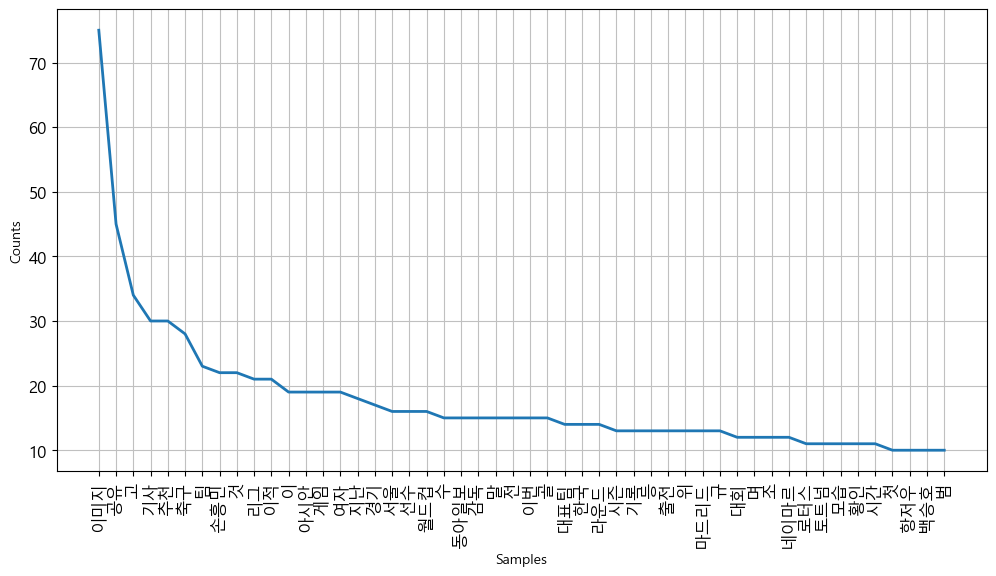

In [35]:
#단어 개수 와 등장 횟수 확인
import nltk
ko = nltk.Text(nouns, name=keyword)
print('전체 단어 개수:', len(ko.tokens))
print('전체 단어 개수 - 중복 제거:', len(set(ko.tokens)))
print(ko.vocab())
plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

In [36]:
#불용어 제거
stop_words = ['이미지', '공유', '것', '유관순', '등']
ko_1 = [each_word for each_word in ko if each_word not in stop_words]
ko_2 = [each_word for each_word in ko_1 if len(each_word) > 1]
print(ko_2)

['크게', '보기', '로터스', '영국', '프로축구', '구단', '노리치', '시티', '유니폼', '키트', '스폰서', '연장', '현재', '잉글랜드', '챔피언십', '리그', '노리치', '잉글랜드', '노리치', '기반', '로터스', '자동차', '파트너', '방침', '카나리아', '애칭', '사람', '시선', '노리치', '시티', '유니폼', '로터스', '자동차', '로고', '지난', '시즌', '노리치', '시티', '핵심', '파트너', '활약', '중인', '로터스', '자동차', '지난', '노리치', '시티', '웨이', '유니폼', '스폰서', '진행', '경험', '크게', '보기', '이외', '완공', '증축', '구단', '훈련', '시설', '로터스', '트레이닝', '센터', '지원', '축구', '관련', '행사', '통해', '지역', '사회', '관계도', '발전', '중이', '윈들', '로터스', '자동차', '매니', '디렉터', '스폰서', '연장', '발표', '노리치', '시티', '유니폼', '연속', '로터스', '로고', '관계', '통해', '지역', '사회', '가까이', '노력', '한편', '지난', '로터스', '자동차', '공식', '파트너', '계약', '체결', '로터스', '카스', '코리아', '설립', '코오롱', '모빌리티', '그룹', '국내', '로터스', '자동차', '공식', '수입', '로서', '단독', '유통', '현재', '로터스', '자동차', '마지막', '내연기관', '스포츠카', '미라', '모델', '사전예약', '진행', '중이', '순수', '전기', '하이퍼', '레트', '사전예약', '시작', '예정', '동아닷컴', '김상준', '기자', '기사', '추천', '기사', '추천', '동아일보', '프리', '닥터', '갈무리', '토트넘', '손흥민', '거주', '영국', '아파트', '조명', '방송', '프리', '닥터', '해

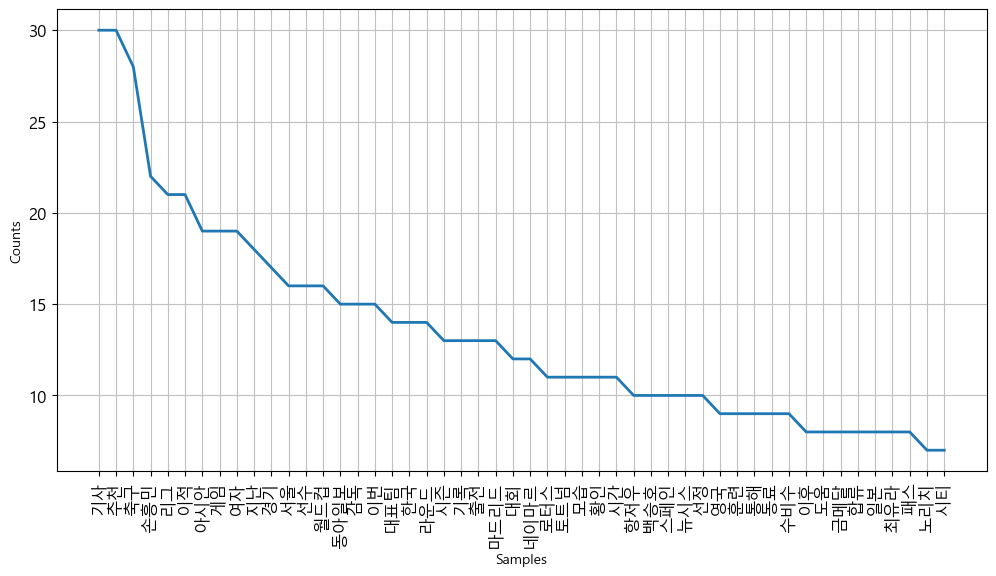

In [37]:
ko = nltk.Text(ko_2, name=keyword)
plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

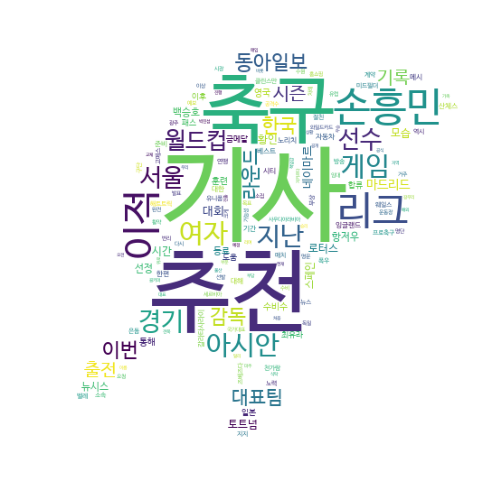

In [47]:
data = ko.vocab().most_common(150)
mask = np.array(Image.open('./data/applebar.png'))
wordcloud = WordCloud(relative_scaling=0.5, font_path='./data/NanumBarunGothic.ttf',
                     background_color='white', mask=mask).generate_from_frequencies(dict(data))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 텍스트 분류

In [3]:
# 데이터 가져오기
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all', random_state=42)
print(news_data.keys())

#분포 확인
#분포가 한 쪽으로 치우치면 층화 추출, 오버 샘플링, 언더 샘플링, 로그 변환 등을 선택해야함
print(pd.Series(news_data.target).value_counts().sort_index())

#클래스 이름 확인
print(news_data.target_names)

#데이터 확인
print(news_data.data[0])
#데이터를 확인해보면 기사 내용 뿐 아니라 제목이나 작성자, 소속, 이메일 등이 포함되어 있어서 이 부분은 제거를 하고 사용
#이 경우는 데이터를 가져올 때 remove 옵션에 headers, footers, quotes 를 설정하면 텍스트만 넘어옵니다.

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Dev

In [5]:
print(news_data.filenames)

['C:\\Users\\USER\\scikit_learn_data\\20news_home\\20news-bydate-test\\rec.sport.hockey\\54367'
 'C:\\Users\\USER\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.ibm.pc.hardware\\60215'
 'C:\\Users\\USER\\scikit_learn_data\\20news_home\\20news-bydate-train\\talk.politics.mideast\\76120'
 ...
 'C:\\Users\\USER\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.ibm.pc.hardware\\60695'
 'C:\\Users\\USER\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38319'
 'C:\\Users\\USER\\scikit_learn_data\\20news_home\\20news-bydate-test\\rec.autos\\103195']


In [7]:
# header 나 footers, quotes 를 제거하고 훈련 데이터 가져오기
train_news= fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'),
                               random_state=42)

# 훈련 데이터 생성
X_train = train_news.data
y_train = train_news.target
print(type(X_train))

test_news= fetch_20newsgroups(subset='test',remove=('headers', 'footers','quotes'),
                              random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0} , 테스트 데이터 크기 {1}'.format(len(train_news.data) ,
len(test_news.data)))

<class 'list'>
학습 데이터 크기 11314 , 테스트 데이터 크기 7532


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# 단어가 등장한 개수 기반의 벡터화를 위한 인스턴스 생성
cnt_vect = CountVectorizer()

# 벡터화
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)
X_test_cnt_vect = cnt_vect.transform(X_test)

### 로지스틱 회귀를 이용한 분류

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# LogisticRegression을 이용하여 학습/예측/평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect , y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))
# 정확도는 0.607

CountVectorized Logistic Regression 의 예측 정확도는 0.607


### TD-IDF 이용

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환.
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)
# LogisticRegression을 이용하여 학습/예측/평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))
# 예측 정확도는 0.674

TF-IDF Logistic Regression 의 예측 정확도는 0.674


In [18]:
# stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경하여 Feature Vectorization 적용.
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300 )
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))
# 예측 정확도는 0.692

TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.692


### 나이브 베이즈를 이용한 감성 분석

In [19]:
train = [('i like you', 'pos'), ('i do not like you', 'neg'),
         ('i hate you', 'neg'), ('i do not hate you', 'pos'),
         ('i love you', 'pos'), ('I do not love you', 'neg')]

# 등장한 모든 단어 찾기
from nltk.tokenize import word_tokenize
import nltk

all_words = set(word.lower() for sentence in train 
                for word in word_tokenize(sentence[0]))
all_words

{'do', 'hate', 'i', 'like', 'love', 'not', 'you'}

In [21]:
# 분류기 만들기
# 단어 토큰화 - 각 문장의 단어의 포함 여부를 만들고 감성을 기록
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
print(t)

[({'hate': False, 'not': False, 'i': True, 'do': False, 'love': False, 'like': True, 'you': True}, 'pos'), ({'hate': False, 'not': True, 'i': True, 'do': True, 'love': False, 'like': True, 'you': True}, 'neg'), ({'hate': True, 'not': False, 'i': True, 'do': False, 'love': False, 'like': False, 'you': True}, 'neg'), ({'hate': True, 'not': True, 'i': True, 'do': True, 'love': False, 'like': False, 'you': True}, 'pos'), ({'hate': False, 'not': False, 'i': True, 'do': False, 'love': True, 'like': False, 'you': True}, 'pos'), ({'hate': False, 'not': True, 'i': False, 'do': True, 'love': True, 'like': False, 'you': True}, 'neg')]


In [22]:
#텍스트 분류를 위한 나이브베이즈 분류기를 이용해서 모델을 생성
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                      do = False             pos : neg    =      1.7 : 1.0
                      do = True              neg : pos    =      1.7 : 1.0
                     not = False             pos : neg    =      1.7 : 1.0
                     not = True              neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.4 : 1.0
                    hate = False             neg : pos    =      1.0 : 1.0
                    hate = True              neg : pos    =      1.0 : 1.0
                    like = False             neg : pos    =      1.0 : 1.0
                    like = True              neg : pos    =      1.0 : 1.0


In [24]:
# 예측
test_sentence = 'i do not like jessica'
test_sent_features = {word.lower():(word in word_tokenize(test_sentence.lower())) 
                      for word in all_words}
print(test_sent_features)
print(classifier.classify(test_sent_features))

{'hate': False, 'not': True, 'i': True, 'do': True, 'love': False, 'like': True, 'you': False}
neg


### 한글 감성 분석

In [26]:
train = [('나는 당신을 사랑합니다', 'pos'), ('나는 당신을 사랑하지 않아요', 'neg'),
         ('나는 당신을 만나는 것이 지루합니다', 'neg'), ('나는 당신을 만나는 것이 지루하지 않습니다', 'pos'),
         ('나는 당신이 좋습니다', 'pos'), ('나는 당신이 좋지 않습니다', 'neg'),
         ('나는 당신과 노는 것이 즐겁습니다', 'pos'), ('나는 당신과 노는 것이 즐겁지 않습니다', 'neg'),
         ('나는 제시카와 함께 있는 것이 즐겁습니다', 'pos'), ('나는 일을 하는 것이 즐겁지 않습니다', 'neg'),
         ('나는 일이 너무 힘들어', 'neg')]

all_words = set(word.lower() for sentence in train
                for word in word_tokenize(sentence[0]))

print(all_words)

{'당신과', '하는', '있는', '당신을', '일을', '즐겁습니다', '만나는', '즐겁지', '일이', '사랑합니다', '노는', '좋습니다', '사랑하지', '지루하지', '않아요', '않습니다', '함께', '것이', '나는', '지루합니다', '너무', '힘들어', '당신이', '좋지', '제시카와'}


In [27]:
from konlpy.tag import Twitter
twitter = Twitter()

def tokenize(doc):
    return ['/'.join(t) for t in twitter.pos(doc, norm=True, stem=True)]

train_docs = [(tokenize(row[0]), row[1]) for row in train]
print(train_docs)

[(['나/Noun', '는/Josa', '당신/Noun', '을/Josa', '사랑/Noun', '하다/Verb'], 'pos'), (['나/Noun', '는/Josa', '당신/Noun', '을/Josa', '사랑/Noun', '하다/Verb', '않다/Verb'], 'neg'), (['나/Noun', '는/Josa', '당신/Noun', '을/Josa', '만나다/Verb', '것/Noun', '이/Josa', '지루하다/Adjective'], 'neg'), (['나/Noun', '는/Josa', '당신/Noun', '을/Josa', '만나다/Verb', '것/Noun', '이/Josa', '지루하다/Adjective', '않다/Verb'], 'pos'), (['나/Noun', '는/Josa', '당신/Noun', '이/Josa', '좋다/Adjective'], 'pos'), (['나/Noun', '는/Josa', '당신/Noun', '이/Josa', '좋다/Adjective', '않다/Verb'], 'neg'), (['나/Noun', '는/Josa', '당신/Noun', '과/Josa', '노/Noun', '는/Josa', '것/Noun', '이/Josa', '즐겁다/Adjective'], 'pos'), (['나/Noun', '는/Josa', '당신/Noun', '과/Josa', '노/Noun', '는/Josa', '것/Noun', '이/Josa', '즐겁다/Adjective', '않다/Verb'], 'neg'), (['나/Noun', '는/Josa', '제시카/Noun', '와/Josa', '함께/Adverb', '있다/Adjective', '것/Noun', '이/Josa', '즐겁다/Adjective'], 'pos'), (['나/Noun', '는/Josa', '일/Noun', '을/Josa', '하다/Verb', '것/Noun', '이/Josa', '즐겁다/Adjective', '않다/Verb'], 'neg'), (['나/Noun', '는/Josa'

In [29]:
# 단어만 추출하기
tokens = [t for d in train_docs for t in d[0]]
print(tokens)

['나/Noun', '는/Josa', '당신/Noun', '을/Josa', '사랑/Noun', '하다/Verb', '나/Noun', '는/Josa', '당신/Noun', '을/Josa', '사랑/Noun', '하다/Verb', '않다/Verb', '나/Noun', '는/Josa', '당신/Noun', '을/Josa', '만나다/Verb', '것/Noun', '이/Josa', '지루하다/Adjective', '나/Noun', '는/Josa', '당신/Noun', '을/Josa', '만나다/Verb', '것/Noun', '이/Josa', '지루하다/Adjective', '않다/Verb', '나/Noun', '는/Josa', '당신/Noun', '이/Josa', '좋다/Adjective', '나/Noun', '는/Josa', '당신/Noun', '이/Josa', '좋다/Adjective', '않다/Verb', '나/Noun', '는/Josa', '당신/Noun', '과/Josa', '노/Noun', '는/Josa', '것/Noun', '이/Josa', '즐겁다/Adjective', '나/Noun', '는/Josa', '당신/Noun', '과/Josa', '노/Noun', '는/Josa', '것/Noun', '이/Josa', '즐겁다/Adjective', '않다/Verb', '나/Noun', '는/Josa', '제시카/Noun', '와/Josa', '함께/Adverb', '있다/Adjective', '것/Noun', '이/Josa', '즐겁다/Adjective', '나/Noun', '는/Josa', '일/Noun', '을/Josa', '하다/Verb', '것/Noun', '이/Josa', '즐겁다/Adjective', '않다/Verb', '나/Noun', '는/Josa', '일이/Modifier', '너무/Adverb', '힘들다/Adjective']


In [30]:
### 분류기 만들기 - 문장에 단어의 존재 여부를 확인해주는 함수
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}
# 모든 문장을 해석해서 단어의 존재 여부와 감성을 가진 튜플의 list 생성
train_xy = [(term_exists(d), c) for d,c in train_docs]
print(train_xy)

[({'나/Noun': True, '는/Josa': True, '당신/Noun': True, '을/Josa': True, '사랑/Noun': True, '하다/Verb': True, '않다/Verb': False, '만나다/Verb': False, '것/Noun': False, '이/Josa': False, '지루하다/Adjective': False, '좋다/Adjective': False, '과/Josa': False, '노/Noun': False, '즐겁다/Adjective': False, '제시카/Noun': False, '와/Josa': False, '함께/Adverb': False, '있다/Adjective': False, '일/Noun': False, '일이/Modifier': False, '너무/Adverb': False, '힘들다/Adjective': False}, 'pos'), ({'나/Noun': True, '는/Josa': True, '당신/Noun': True, '을/Josa': True, '사랑/Noun': True, '하다/Verb': True, '않다/Verb': True, '만나다/Verb': False, '것/Noun': False, '이/Josa': False, '지루하다/Adjective': False, '좋다/Adjective': False, '과/Josa': False, '노/Noun': False, '즐겁다/Adjective': False, '제시카/Noun': False, '와/Josa': False, '함께/Adverb': False, '있다/Adjective': False, '일/Noun': False, '일이/Modifier': False, '너무/Adverb': False, '힘들다/Adjective': False}, 'neg'), ({'나/Noun': True, '는/Josa': True, '당신/Noun': True, '을/Josa': True, '사랑/Noun': False, '하다/Verb': False,

In [31]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)
classifier.show_most_informative_features()

Most Informative Features
                 않다/Verb = True              neg : pos    =      2.6 : 1.0
                 않다/Verb = False             pos : neg    =      2.1 : 1.0
                 당신/Noun = False             neg : pos    =      1.4 : 1.0
                  이/Josa = False             neg : pos    =      1.4 : 1.0
                 하다/Verb = True              neg : pos    =      1.4 : 1.0
                  와/Josa = False             neg : pos    =      1.2 : 1.0
            있다/Adjective = False             neg : pos    =      1.2 : 1.0
                제시카/Noun = False             neg : pos    =      1.2 : 1.0
               함께/Adverb = False             neg : pos    =      1.2 : 1.0
                  것/Noun = False             neg : pos    =      1.2 : 1.0


In [32]:
test_sentence = [("여섯시 부터 일을 해야해")]
test_docs = twitter.pos(test_sentence[0])
print(test_docs)
test_sent_features = {word: (word in tokens) for word in test_docs}
print(test_sent_features)
print(classifier.classify(test_sent_features))

[('여섯시', 'Noun'), ('부터', 'Noun'), ('일', 'Noun'), ('을', 'Josa'), ('해야해', 'Verb')]
{('여섯시', 'Noun'): False, ('부터', 'Noun'): False, ('일', 'Noun'): False, ('을', 'Josa'): False, ('해야해', 'Verb'): False}
neg


### IMDB 데이터를 이용한 감성분석

In [37]:
review_df = pd.read_csv('./data/imdb/labeledTrainData.tsv', header=0, sep="\t", quoting=3)

# id 는 review를 구분하기 위한 데이터
# sentiment 가 감성인데 1이면 긍정 2이면 부정
# review 가 review 데이터
review_df.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [39]:
# 정규식을 이용해서 불필요한 데이터 제거
import re
# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')
# Python의 정규 표현식 모듈인 re를 이용하여 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review'] = review_df['review'].apply( lambda x : re.sub("[^a-zA-Z]", " ", x) )

In [40]:
print(review_df.head())

         id  sentiment                                             review
0  "5814_8"          1   With all this stuff going down at the moment ...
1  "2381_9"          1     The Classic War of the Worlds   by Timothy ...
2  "7759_3"          0   The film starts with a manager  Nicholas Bell...
3  "3630_4"          0   It must be assumed that those who praised thi...
4  "9495_8"          1   Superbly trashy and wondrously unpretentious ...


In [43]:
# 훈련 데이터와 테스트 데이터 분할
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id','sentiment'], axis=1, inplace=False)

X_train, X_test, y_train, y_test= train_test_split(feature_df, class_df, test_size=0.3,
random_state=42)
X_train.shape, X_test.shape

((17500, 1), (7500, 1))

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
# 스톱 워드는 English, filtering, ngram은 (1,2)로 설정해 CountVectorization수행.
# LogisticRegression의 C는 10으로 설정.
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))])

# Pipeline 객체를 이용하여 
# fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc때문에 수행.
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

In [45]:
print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred), roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8847, ROC-AUC는 0.9508


In [46]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]
print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred), roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8916, ROC-AUC는 0.9592


In [48]:
df = pd.read_csv("./data/review_data.csv")
print(df.head())

   score                      review  y
0      5            친절하시고 깔끔하고 좋았습니다  1
1      5                  조용하고 고기도 굿  1
2      4      갈비탕과 냉면, 육회비빔밥이 맛있습니다.  1
3      4  대체적으로 만족하나\n와인의 구성이 살짝 아쉬움  1
4      5       고기도 맛있고 서비스는 더 최고입니다~  1


In [49]:
import re
# 한글만 추출해주는 함수
def text_cleaning(text):
    # 한글의 정규표현식으로 한글만 추출합니다.  
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

df['ko_text'] = df['review'].apply(lambda x: text_cleaning(x))
del df['review']
df.head()

,score,y,ko_text
0,5,1,친절하시고 깔끔하고 좋았습니다
1,5,1,조용하고 고기도 굿
2,4,1,갈비탕과 냉면 육회비빔밥이 맛있습니다
3,4,1,대체적으로 만족하나와인의 구성이 살짝 아쉬움
4,5,1,고기도 맛있고 서비스는 더 최고입니다


### 형태소 분석

In [52]:
from konlpy.tag import Okt

def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    pos = ['{}/{}'.format(word, tag) for word, tag in pos]
    return pos

# 하나의 데이터로 확인
result = get_pos(df['ko_text'][0])
print(result)

['친절하시고/Adjective', '깔끔하고/Adjective', '좋았습니다/Adjective']


### 피처 벡터화

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
# 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환
index_vectorizer = CountVectorizer(tokenizer = lambda x: get_pos(x))
X = index_vectorizer.fit_transform(df['ko_text'].tolist())
print(X.shape)

(545, 3030)


In [58]:
# 피처 확인
print(str(index_vectorizer.vocabulary_)[:100])
print(df['ko_text'][0])
print(X[0])

{'친절하시고/Adjective': 2647, '깔끔하고/Adjective': 428, '좋았습니다/Adjective': 2403, '조용하고/Adjective': 2356, '고
친절하시고 깔끔하고 좋았습니다
  (0, 2647)	1
  (0, 428)	1
  (0, 2403)	1


In [59]:
from sklearn.feature_extraction.text import TfidfTransformer
# TF-IDF 방법으로, 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환합니다.
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)
print(X.shape)
print(X[0])

(545, 3030)
  (0, 2647)	0.5548708693511647
  (0, 2403)	0.48955631270748484
  (0, 428)	0.6726462183300624


### 학습용 데이터와 훈련용 데이터를 생성

In [60]:
from sklearn.model_selection import train_test_split
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(x_train.shape)
print(x_test.shape)

(381, 3030)
(164, 3030)


### 모델 훈련 및 평가

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 로지스틱 회귀모델을 학습
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]
# 로지스틱 회귀모델의 성능 평가
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.90
Precision : 0.896
Recall : 1.000
F1 : 0.945


In [62]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix를 출력합니다.
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[  0  17]
 [  0 147]]


### 타겟 분포 확인

In [64]:
df['y'].value_counts()

1    492
0     53
Name: y, dtype: int64

### UnderSampling

In [68]:
positive_random_idx = df[df['y']==1].sample(50, random_state=30).index.tolist()
negative_random_idx = df[df['y']==0].sample(50, random_state=30).index.tolist()

# 랜덤 데이터로 데이터셋을 나눕니다.
random_idx = positive_random_idx + negative_random_idx
sample_X = X[random_idx, :]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(sample_X, y, test_size=0.30)
print(x_train.shape)
print(x_test.shape)

(70, 3030)
(30, 3030)


In [72]:
# 로지스틱 회귀모델을 다시 학습합니다.
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]
# 학습한 모델을 테스트 데이터로 평가합니다.
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.70
Precision : 0.650
Recall : 0.867
F1 : 0.743


In [73]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix를 출력합니다.
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[ 8  7]
 [ 2 13]]


### 토픽 모델링 - LDA

In [80]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 데이터를 가져올 카테고리 설정
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 카테고리에 해당하는 데이터만 가져오기
news_df= fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'), 
                            categories=cats, random_state=42)

In [81]:
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2,
stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [82]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [83]:
print(lda.components_.shape)

(8, 1000)


In [89]:
# 각 토픽에서 중요한 10개 단어를 추출
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)
        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 
        # 그 값의 array index를반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]

        # 단어 찾아주는 작업
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)
        
# sklearn 의 최신 버전에서 get_featrue_names 함수가 없어지고 
# count_vect.get_feature_names_out()로 변경됨
feature_names = count_vect.get_feature_names_out()
print(lda)
print(feature_names)
# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

LatentDirichletAllocation(n_components=8, random_state=0)
['00' '000' '01' '02' '03' '04' '05' '10' '100' '11' '12' '128' '13' '14'
 '15' '16' '17' '18' '19' '1990' '1991' '1992' '1993' '20' '200' '21' '22'
 '23' '24' '24 bit' '25' '256' '26' '27' '28' '29' '30' '300' '31' '32'
 '35' '3d' '40' '44' '50' '500' '60' '80' '800' '90' '91' '92' '93'
 'ability' 'able' 'ac' 'accept' 'accepted' 'access' 'according' 'act'
 'action' 'actions' 'acts' 'actually' 'add' 'added' 'addition' 'address'
 'adl' 'advance' 'age' 'ago' 'agree' 'aids' 'al' 'allow' 'american'
 'amiga' 'analysis' 'anonymous' 'anonymous ftp' 'answer' 'answers' 'anti'
 'anybody' 'apartment' 'apparently' 'appear' 'appears' 'application'
 'applications' 'apply' 'appreciate' 'appreciated' 'approach'
 'appropriate' 'april' 'arab' 'arabs' 'archive' 'area' 'areas' 'aren'
 'argic' 'argument' 'armenia' 'armenian' 'armenians' 'army' 'art'
 'article' 'articles' 'ask' 'asked' 'assume' 'attack' 'attempt' 'author'
 'available' 'average' 'avoi

### 텍스트 군집

In [105]:
import glob ,os
# 디렉토리 이름을 생성
path = './data/OpinosisDataset1.0/topics' 
# 디렉토리 안의 모든 파일 이름을 list 로 생성
all_files = glob.glob(os.path.join(path, "*.data"))
# print('all_files')

# filename_list = []
# opinion_text = []

# 파일 경로를 순회하면서 파일의 내용을 읽어서 하나로 만들기
# for file_ in all_files:
#     # 개별 파일을 읽어서 DataFrame으로 생성
#     df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
#     # 절대경로로 주어진 file 명을 가공. 
#     # 만일 Windows에서 수행시에는 아래 /를 \\ 변경. 맨 마지막 .data 확장자도 제거
#     filename_ = file_.split('/')[-1]
#     filename = filename_.split('.')[0]
#     #파일명 리스트와 파일내용 리스트에 파일명과 파일 내용을 추가.
#     filename_list.append(filename)
# opinion_text.append(df.to_string())



'accuracy_garmin_nuvi_255W_gps.txt.data'